# About the Notebook
 *  <a href="#Introduction">Introduction</a>
*  <a href="#EDA">EDA</a>
    *  Pivot Tables
    *  Box Plots and Violin Charts
    

    

# Introduction
We are provided with two datasets, namely -  
Los Angeles County Restaurant And Market Inspections :  
https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-INSPECTIO/6ni6-h5kp  
Los Angeles County Restaurant And Market Violations :   
https://data.lacounty.gov/Health/LOS-ANGELES-COUNTY-RESTAURANT-AND-MARKET-VIOLATION/8jyd-4pv9  

By going throught the above links, we can find that the Violations dataset itslef contains information about Inspections data as well, in th datasets provided by Kaggle.
([Link for Kaggle Data Set](http://www.kaggle.com/meganrisdal/la-county-restaurant-inspections-and-violations/home ))


### Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
 
inspections = pd.read_csv("../input/restaurant-and-market-health-inspections.csv")
violations = pd.read_csv("../input/restaurant-and-market-health-violations.csv")

Let`s inspect both the datasets and have a look on the both of the datasets samples.  
### Inspections

In [2]:
inspections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67573 entries, 0 to 67572
Data columns (total 20 columns):
serial_number          67573 non-null object
activity_date          67573 non-null object
facility_name          67573 non-null object
score                  67573 non-null int64
grade                  67570 non-null object
service_code           67573 non-null int64
service_description    67573 non-null object
employee_id            67573 non-null object
facility_address       67573 non-null object
facility_city          67573 non-null object
facility_id            67573 non-null object
facility_state         67573 non-null object
facility_zip           67573 non-null object
owner_id               67573 non-null object
owner_name             67573 non-null object
pe_description         67573 non-null object
program_element_pe     67573 non-null int64
program_name           67544 non-null object
program_status         67573 non-null object
record_id              67573 non-null o

In [3]:
inspections.head(5)

,serial_number,activity_date,facility_name,score,grade,service_code,service_description,employee_id,facility_address,facility_city,facility_id,facility_state,facility_zip,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id
0,DAJ00E07B,2017-12-29T00:00:00.000,HABITAT COFFEE SHOP,95,A,1,ROUTINE INSPECTION,EE0000923,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,CA,90065,OW0178123,GLASSELL COFFEE SHOP LLC,RESTAURANT (0-30) SEATS MODERATE RISK,1631,HABITAT COFFEE SHOP,ACTIVE,PR0160774
1,DAQOKRFZB,2017-12-29T00:00:00.000,REILLY'S,92,A,1,ROUTINE INSPECTION,EE0000633,100 WORLD WAY # 120,LOS ANGELES,FA0244690,CA,90045,OW0208441,"AREAS SKYVIEW LAX JV, LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,REILLY'S,ACTIVE,PR0193026
2,DASJI4LUR,2017-12-29T00:00:00.000,STREET CHURROS,93,A,1,ROUTINE INSPECTION,EE0000835,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,CA,90028,OW0228670,"STREETCHURROS, INC",RESTAURANT (0-30) SEATS LOW RISK,1630,STREET CHURROS,ACTIVE,PR0179282
3,DA40LU5AT,2017-12-29T00:00:00.000,TRINITI ECHO PARK,94,A,1,ROUTINE INSPECTION,EE0000923,1814 W SUNSET BLVD,LOS ANGELES,FA0252528,CA,90026-3227,OW0246287,AMERICAN HOSPITALITY,RESTAURANT (0-30) SEATS MODERATE RISK,1631,TRINITI ECHO PARK,ACTIVE,PR0201836
4,DAXV2RMYC,2017-12-29T00:00:00.000,POLLEN,94,A,1,ROUTINE INSPECTION,EE0000923,2100 ECHO PARK AVE,LOS ANGELES,FA0252789,CA,90026,OW0246479,"POLLEN AND PASTRY , LLC",RESTAURANT (0-30) SEATS MODERATE RISK,1631,POLLEN,ACTIVE,PR0202148


### Vioalations

In [4]:
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313675 entries, 0 to 313674
Data columns (total 25 columns):
serial_number            313675 non-null object
activity_date            313675 non-null object
facility_name            313675 non-null object
violation_code           313675 non-null object
violation_description    313675 non-null object
violation_status         313675 non-null object
points                   313675 non-null int64
grade                    313618 non-null object
facility_address         313675 non-null object
facility_city            313675 non-null object
facility_id              313675 non-null object
facility_state           313675 non-null object
facility_zip             313675 non-null object
employee_id              313675 non-null object
owner_id                 313675 non-null object
owner_name               313675 non-null object
pe_description           313675 non-null object
program_element_pe       313675 non-null int64
program_name             31

In [5]:
violations.head(5)

,serial_number,activity_date,facility_name,violation_code,violation_description,violation_status,points,grade,facility_address,facility_city,facility_id,facility_state,facility_zip,employee_id,owner_id,owner_name,pe_description,program_element_pe,program_name,program_status,record_id,score,service_code,service_description,row_id
0,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F030,# 30. Food properly stored; food storage conta...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF030
1,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F027,# 27. Food separated and protected,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF027
2,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF035
3,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF033
4,DA08R0TCU,2018-03-30T00:00:00.000,KRUANG TEDD,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE,1,A,5151 HOLLYWOOD BLVD,LOS ANGELES,FA0064949,CA,90027,EE0000857,OW0001034,5151 HOLLYWOOD LLC,RESTAURANT (31-60) SEATS HIGH RISK,1635,KRUANG TEDD,ACTIVE,PR0031205,92,1,ROUTINE INSPECTION,DA08R0TCUF029


We will start exploring Violation datasets from here - 

### PE Description  
Describes the type of program.  
From the below table we get to know that, this feild can be further expanded to more categorries like, Type, Seating Strength, and Risk Type which can help in more detailing.
Moreover,  4 out of 18 program type, constitute more than 60% of the total dataset, in which **RESTAURANT (0-30) SEATS HIGH RISK** is just more than 25%.

In [6]:
pd.DataFrame(round(violations['pe_description'].value_counts(normalize=True)*100,2))

,pe_description
RESTAURANT (0-30) SEATS HIGH RISK,25.66
RESTAURANT (31-60) SEATS HIGH RISK,18.20
RESTAURANT (0-30) SEATS MODERATE RISK,14.21
RESTAURANT (61-150) SEATS HIGH RISK,13.54
RESTAURANT (151 + ) SEATS HIGH RISK,4.47
"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",3.73
"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",3.14
RESTAURANT (31-60) SEATS MODERATE RISK,2.51
"FOOD MKT RETAIL (2,000+ SF) HIGH RISK",2.30
"FOOD MKT RETAIL (1-1,999 SF) HIGH RISK",2.28


### Program Status
Indicates the status of the program, categories into Active and Inactive in active constitute around 88 % of all dataset.

In [7]:
pd.DataFrame(round(violations['program_status'].value_counts(normalize=True)*100,2))

,program_status
ACTIVE,87.22
INACTIVE,12.78


### Service Description
Describes the service that was performed. We see that most of the inspection held were Routined one (around 98%)

In [8]:
pd.DataFrame(round(violations['service_description'].value_counts(normalize=True)*100,2))

,service_description
ROUTINE INSPECTION,98.3
OWNER INITIATED ROUTINE INSPECT.,1.7


### Violation Status
Identifies the status of the violation. Most prevailing Violation STatus is **Out of Compliane**, nearly 100%

In [9]:
pd.DataFrame(round(violations['violation_status'].value_counts(normalize=True)*100,4))

,violation_status
OUT OF COMPLIANCE,99.9994
VIOLATION,0.0003
HOUSING NON-CRITICAL,0.0003


**Points** : The amount of points deducted from the score for a violation.  
**Score** : The score of the inspection.  
So, we can create a new column, which will give us the net effective score for each inspection.  
**Net Effective Score** : Score - Points  
We'll also create a new column for Year, although this can be extracted by converting the **activity date** column to datetype, but for the time we'll extract the first four characters of the same column, which in result will give us the Year of the Inspection


In [10]:
violations['Net Effective Score'] = violations['score'] - violations['points']
violations['Year'] = violations['activity_date'].str[:4]

# EDA
Grouping data on Violation Status and seet what is the average net effective score by year. We'll dig into each violation status in further steps.

In [11]:
violations_group = pd.pivot_table(violations, values='Net Effective Score', index=[ 'violation_status'],
                    columns=['Year'], aggfunc=np.mean)
pd.DataFrame(violations_group.to_records())

,violation_status,2015,2016,2017,2018
0,HOUSING NON-CRITICAL,NaN,NaN,100.000000,NaN
1,OUT OF COMPLIANCE,89.629885,90.070152,90.218734,90.644237
2,VIOLATION,NaN,NaN,NaN,70.000000


As noticed earlier and also confirming from above results, we need to filter data based on vioaltion status and then analyzed the individual datasets.The interesting case to analyse will be **OUT OF COMPLIANCE** violation status.

In [12]:
vio_Housing = violations[violations['violation_status'] == "HOUSING NON-CRITICAL"]
vio_Compliance = violations[violations['violation_status'] == "OUT OF COMPLIANCE"]
vio_Violation = violations[violations['violation_status'] == "VIOLATION"]

We cna first, find the net effective score aggregated by multiple variables for Violation Status,  Housing Non-Critical and Violation, as they each constitute to 0.0004%  of all dataset and then will dig into Violation related to Compliance. 

### Housing Non-Critical

In [13]:
vio_Housing_group = pd.pivot_table(vio_Housing, values='Net Effective Score', index=['pe_description','violation_description','facility_name','facility_address','owner_name','grade','program_status','service_description','score','points'],
                    columns=['Year'], aggfunc=np.mean)
pd.DataFrame(vio_Housing_group.to_records())

,pe_description,violation_description,facility_name,facility_address,owner_name,grade,program_status,service_description,score,points,2017
0,RESTAURANT (31-60) SEATS HIGH RISK,Permit Available,SIMPLY SALAD,11726 SAN VICENTE BLVD # 150,"BT LEWIS ENTERPRISES, LLC",A,ACTIVE,ROUTINE INSPECTION,100,0,100


### Vioaltion

In [14]:
vio_Violation_group = pd.pivot_table(vio_Violation, values='Net Effective Score', index=['pe_description','violation_description','facility_name','facility_address','owner_name','grade','program_status','service_description','score','points'],
                    columns=['Year'], aggfunc=np.mean)
pd.DataFrame(vio_Violation_group.to_records())

,pe_description,violation_description,facility_name,facility_address,owner_name,grade,program_status,service_description,score,points,2018
0,RESTAURANT (61-150) SEATS HIGH RISK,# 51. Permit Suspension,MARISCOS EL JATO,2936 E 4TH ST,RAMIREZ LUIS G,C,ACTIVE,ROUTINE INSPECTION,70,0,70


# Vioaltion Status = Complaince 

We'll first visualize the top 4 categories in PE Description, which are frequently occuring in the dataset.The following table shows the top 4 categories in the dataset.Hence, we'll filter the our dataset for Violation Status = Complaince on these four categories


In [15]:
pd.DataFrame(round(violations['pe_description'].value_counts(normalize=True)*100,2)).head(4)

,pe_description
RESTAURANT (0-30) SEATS HIGH RISK,25.66
RESTAURANT (31-60) SEATS HIGH RISK,18.20
RESTAURANT (0-30) SEATS MODERATE RISK,14.21
RESTAURANT (61-150) SEATS HIGH RISK,13.54


In [16]:
box1 = vio_Compliance[(vio_Compliance['pe_description'] == "RESTAURANT (0-30) SEATS HIGH RISK")|
                      (vio_Compliance['pe_description'] == "RESTAURANT (31-60) SEATS HIGH RISK") |
                      (vio_Compliance['pe_description'] == "RESTAURANT (0-30) SEATS MODERATE RISK") |
                      (vio_Compliance['pe_description'] == "RESTAURANT (61-150) SEATS HIGH RISK")]

## Box Plot - Net Effective Score for each selected category in pe_description by Year
The following graph will shoe us the trend in Net effective score in these categories by Year. One can have an idea about the five-number summary for each category within a year about the same.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

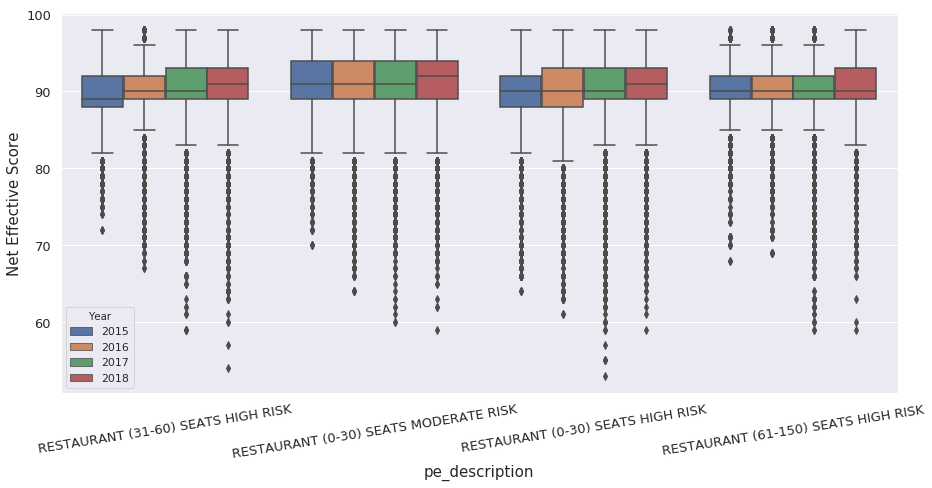

In [17]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

ax = sns.boxplot(x='pe_description', y='Net Effective Score',hue="Year", data=box1)
ax.set_xlabel("pe_description",fontsize=15)
ax.set_ylabel("Net Effective Score",fontsize=15)
ax.tick_params(labelsize=13)
plt.xticks(rotation=9)



## Violin Charts - Net Effective Score for each selected categories in pe_description by Year
We can see that from below graph that, Grade C Restaurant/Market have less net effective score, followed by Grade B which in results followed by Grade A, which has the highest among the all.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

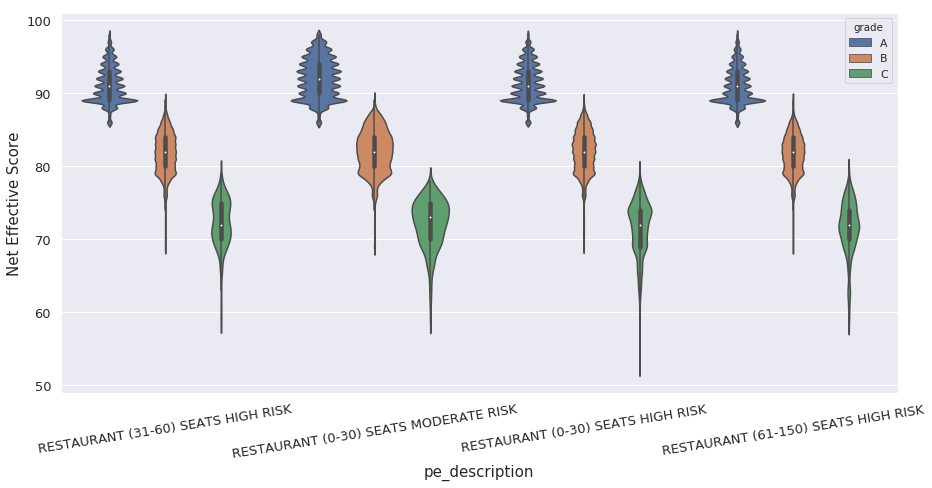

In [18]:
sns.set()
fig, ax = plt.subplots()
fig.set_size_inches(15, 7)

ax = sns.violinplot(x='pe_description', y='Net Effective Score',hue="grade", data=box1)
ax.set_xlabel("pe_description",fontsize=15)
ax.set_ylabel("Net Effective Score",fontsize=15)
ax.tick_params(labelsize=13)
plt.xticks(rotation=9)



## Grouping by PE Description and calculation the net effective score by year for each underlying category

In [19]:
pd.set_option("display.max_rows", 20)
vio_Compliance_peDes_group = pd.pivot_table(vio_Compliance, values='Net Effective Score', index=['pe_description'],columns=['Year'], aggfunc=np.mean)
vio_Compliance_peDes = pd.DataFrame(vio_Compliance_peDes_group.to_records())
vio_Compliance_peDes = pd.melt(vio_Compliance_peDes, id_vars='pe_description', value_vars=vio_Compliance_peDes.columns.drop('pe_description')).rename(columns={"variable":"Year", "value":"Avg. Net Effective Score"})
vio_Compliance_peDes

,pe_description,Year,Avg. Net Effective Score
0,CATERER (0-999 SQ. FT.),2015,NaN
1,FOOD MARKET WHOLESALE,2015,NaN
2,"FOOD MKT RETAIL (1-1,999 SF) HIGH RISK",2015,NaN
3,"FOOD MKT RETAIL (1-1,999 SF) LOW RISK",2015,NaN
4,"FOOD MKT RETAIL (1-1,999 SF) MODERATE RISK",2015,NaN
5,"FOOD MKT RETAIL (2,000+ SF) HIGH RISK",2015,88.470968
6,"FOOD MKT RETAIL (2,000+ SF) LOW RISK",2015,92.123457
7,"FOOD MKT RETAIL (2,000+ SF) MODERATE RISK",2015,90.939394
8,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",2015,88.686089
9,"FOOD MKT RETAIL (25-1,999 SF) LOW RISK",2015,92.982759


### Line Plot - Trend in average effective score by pe_descriptiob by year

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text xticklabel objects>)

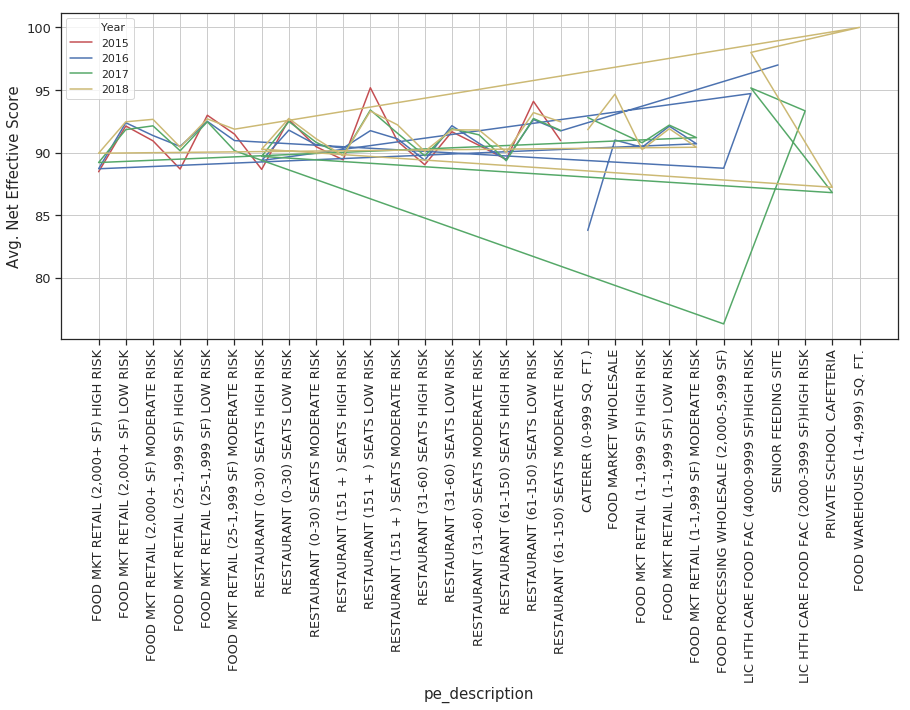

In [20]:
sns.set_style("ticks")
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)

ax = sns.lineplot(x="pe_description", y="Avg. Net Effective Score",hue="Year",palette=["r", "b","g","y"], data=vio_Compliance_peDes)
ax.set_xlabel("pe_description",fontsize=15)
ax.set_ylabel("Avg. Net Effective Score",fontsize=15)
ax.grid(True)
ax.tick_params(labelsize=13)
plt.xticks(rotation=-270)

## Box Plot - For each category in pe_description, a box plot for net effective score by Year, for trend.

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


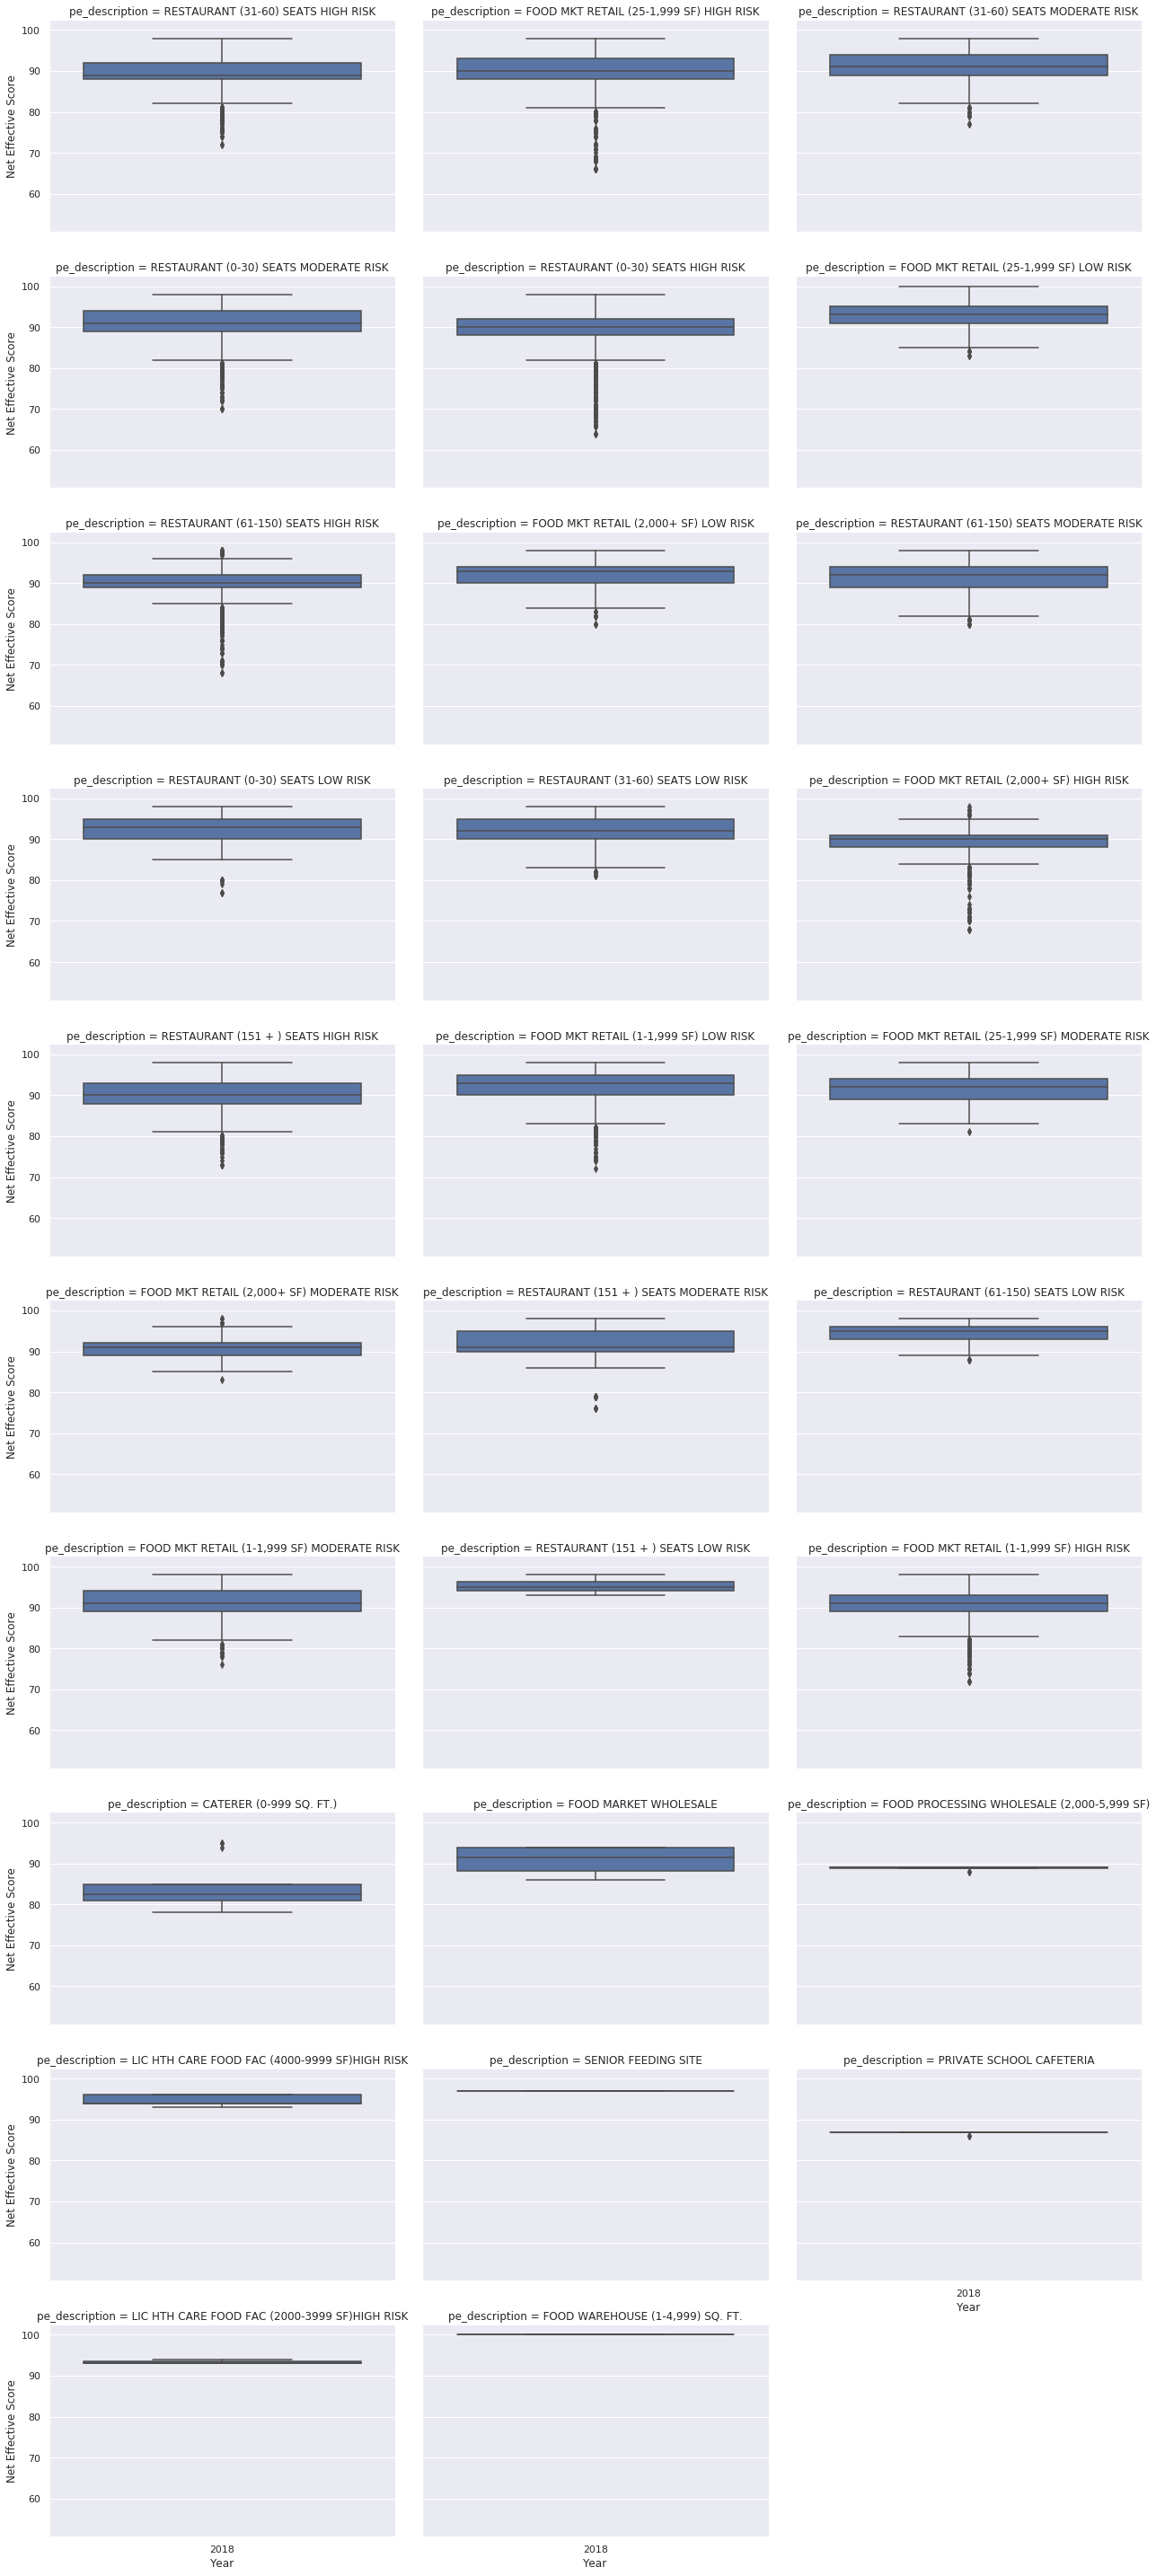

In [21]:
sns.set()

g = sns.FacetGrid(vio_Compliance, col='pe_description',col_wrap=3,height=4, aspect=1.5)
g = g.map(sns.boxplot, "Year", "Net Effective Score")


## Violin Chart - A trend of net effective score by year within a grade

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


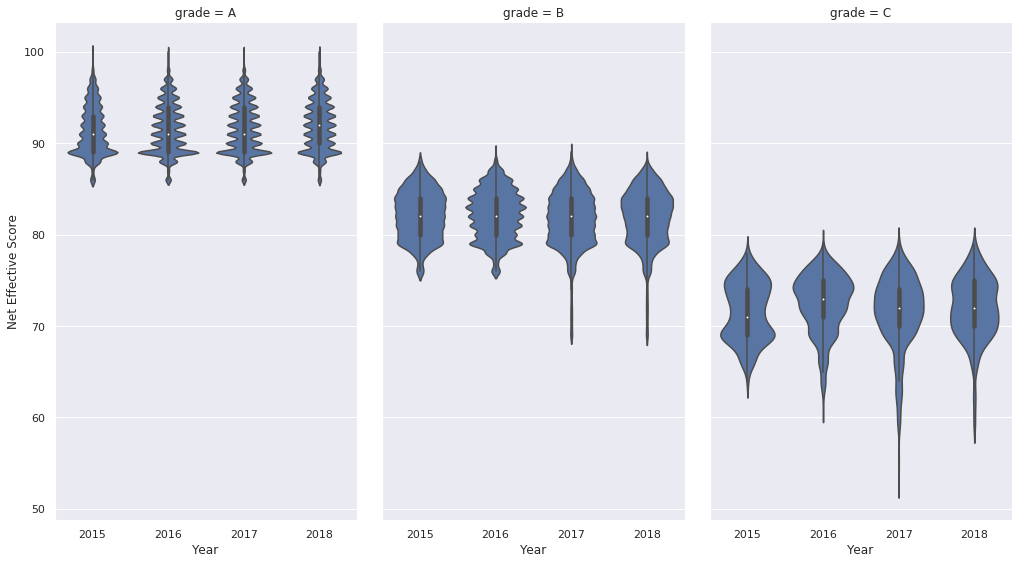

In [22]:
sns.set()

g = sns.FacetGrid(vio_Compliance, col='grade',col_wrap=3,height=8, aspect=0.6)
g = g.map(sns.violinplot, "Year", "Net Effective Score")

## Grouping by Violation Description and calculating the average net effective score by year for each underlying category
Showing only first 10 rows and last 10 rows.

In [23]:
pd.set_option("display.max_rows", 20)
vio_Compliance_VioDes_group = pd.pivot_table(vio_Compliance, values='Net Effective Score', index=['violation_description'],columns=['Year'], aggfunc=np.mean)
vio_Compliance_VioDes = pd.DataFrame(vio_Compliance_VioDes_group.to_records())
vio_Compliance_VioDes

,violation_description,2015,2016,2017,2018
0,# 01a. Demonstration of knowledge,86.371359,87.547774,88.232683,88.808219
1,# 01b. Food safety certification,88.288437,88.318642,88.879550,89.090074
2,"# 02. Communicable disease; reporting, restric...",NaN,82.250000,88.000000,87.000000
3,"# 03. No discharge from eyes, nose, and mouth",85.500000,86.714286,79.500000,88.000000
4,"# 04. Proper eating, drinking, or tobacco use",86.772152,87.960440,87.748718,88.821429
5,# 05. Hands clean and properly washed; gloves ...,84.486842,85.702011,86.565657,85.602151
6,# 06. Adequate handwashing facilities supplied...,88.729831,89.209574,89.397414,89.828286
7,# 07. Proper hot and cold holding temperatures,86.861671,87.224668,87.135446,87.405810
8,# 08. Proper hot and cold holding temperatures,NaN,NaN,NaN,91.000000
9,# 08. Time as a public health control; procedu...,87.000000,87.796992,88.001946,88.055718


## The following tables shows the Name of the facility in each Year, by its Grade in each Violation Descrption with :

### Maximum Net Effective Score 

In [24]:
max_score =vio_Compliance.loc[vio_Compliance.groupby(['Year','violation_description'])['Net Effective Score'].idxmax()]

In [25]:
pd.set_option("display.max_rows", 40)
pd.pivot_table(max_score, values='Net Effective Score', index=['violation_description','Year','grade','facility_name'])

Net Effective Score
violation_description                              Year grade facility_name                                   
# 01a. Demonstration of knowledge                  2015 A     PINKBERRY ARRIVAL                             95
                                                   2016 A     SUBWAY                                        96
                                                   2017 A     SABORES                                       96
                                                   2018 A     KIFF KAFE                                     96
# 01b. Food safety certification                   2015 A     MENDOCINO FARMS                               96
                                                   2016 A     JUAN'S ROTISSERIE POLLO                       96
                                                   2017 A     MACEDONIA HOUSE OF HOPE                       96
                                                   2018 A     LA BARBACHA                                   96
# 02. Communicable disease; reporting, restrict... 2016 A     ELM TREE SANDWICH SHOP                        87
                                                   2017 A     TOKYO EXPRESS                                 88
                                                   2018 A     THE COUNTER SPACE 7C                          87
# 03. No discharge from eyes, nose, and mouth      2015 A     DOMINO'S PIZZA                                90
                                                   2016 A     THE IZAKA-YA                                  92
                                                   2017 B     SLAUSON FISH MARKET                           84
                                                   2018 A     YARDBIRD                                      88
# 04. Proper eating, drinking, or tobacco use      2015 A     KORGAN GINSENG & VITAMINS                     95
                                                   2016 A     VENICE LIQUOR                                 96
                                                   2017 A     OHANA POKE CO.                                96
                                                   2018 A     OCCIDENTAL COLLEGE                            96
# 05. Hands clean and properly washed; gloves u... 2015 A     SUBWAY SANDWICH                               96
...                                                                                                        ...
# 51. Permit Suspension                            2018 A     AFC SUSHI & VONS #2665                        95
# 52. Multiple Major Critical Violations / Incr... 2017 A     LA JALPENSE                                   87
                                                   2018 A     MAYA'S GRILL                                  87
Ceiling constructed of smooth, durable, and non... 2016 A     SAKURA RESTAURANT WAREHOUSE                  100
Equipment, Shelving, Cabinets: approved, mainta... 2016 A     BEVERAGE WAREHOUSE                           100
                                                   2018 A     LA VACA REMOTE STORAGE                       100
Floor maintained clean                             2017 A     SUKARNE                                      100
                                                   2018 A     SUKARNE                                      100
Food elevated                                      2017 A     SUKARNE                                      100
Food storage space                                 2016 A     BIBIGO-REMOTE STORAGE                        100
Garbage / Rubbish receptacles maintained clean ... 2018 A     SUKARNE                                      100
Plumbing approved and maintained in good repair.   2018 A     SUKARNE                                      100
Premises maintained clean and sanitary             2018 A     LA VACA REMOTE STORAGE                       100
Toilet in good repair                              2015 A     EL PAYASITO                      

###  Minimum Net Effective Score

In [26]:
min_score =vio_Compliance.loc[vio_Compliance.groupby(['Year','violation_description'])['Net Effective Score'].idxmin()]

In [27]:
pd.set_option("display.max_rows", 40)
pd.pivot_table(min_score, values='Net Effective Score', index=['violation_description','Year','grade','facility_name'])

Net Effective Score
violation_description                              Year grade facility_name                                           
# 01a. Demonstration of knowledge                  2015 C     E.T. S94 CAFE                                         68
                                                   2016 C     STO. DOMINGO BAKERY                                   63
                                                   2017 C     NEW FLAVORS                                           62
# 01b. Food safety certification                   2015 C     ANTOJITOS Y GARNACHERIA DONA ROSITA                   66
                                                   2016 C     STO. DOMINGO BAKERY                                   63
                                                   2017 C     NEW FLAVORS                                           62
# 02. Communicable disease; reporting, restrict... 2016 B     HYPERION PUBLIC                                       76
                                                   2017 A     TOKYO EXPRESS                                         88
                                                   2018 A     THE COUNTER SPACE 7C                                  87
# 03. No discharge from eyes, nose, and mouth      2015 B     MYUNG DONG KYO JA                                     81
                                                   2016 B     JUBILEE DONUTS                                        78
                                                   2017 C     7-ELEVEN #37042A                                      75
                                                   2018 A     YARDBIRD                                              88
# 04. Proper eating, drinking, or tobacco use      2015 C     OLYMPIC NOODLES                                       70
                                                   2016 C     STO. DOMINGO BAKERY                                   63
                                                   2017 C     CHOICE MARKET                                         68
                                                   2018 C     MANDARIN HOUSE                                        68
# 05. Hands clean and properly washed; gloves u... 2015 C     HANG  WOON  SUL  LUNG  TANG                           66
                                                   2016 C     STO. DOMINGO BAKERY                                   63
                                                   2017 C     HAWAIIAN BBQ HOUSE                                    68
...                                                                                                                ...
# 51. Permit Suspension                            2016 C     STO. DOMINGO BAKERY                                   65
                                                   2017 C     CHINA WOK                                             64
# 52. Multiple Major Critical Violations / Incr... 2017 C     NEW FLAVORS                                           61
Ceiling constructed of smooth, durable, and non... 2016 A     SAKURA RESTAURANT WAREHOUSE                          100
Equipment, Shelving, Cabinets: approved, mainta... 2016 A     BEVERAGE WAREHOUSE                                   100
                                                   2018 A     LA VACA REMOTE STORAGE                               100
Floor maintained clean                             2017 A     SUKARNE                                              100
                                                   2018 A     SUKARNE                                              100
Food elevated                                      2017 A     SUKARNE                                              100
Food storage space                                 2016 A     BIBIGO-REMOTE STORAGE                                100
Garbage / Rubbish receptacles maintained clean ... 2018 A     SUKARNE                                              100
Plumbing approved and maintained in good repair.   20